In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from imblearn.over_sampling import RandomOverSampler

In [2]:
df = pd.read_excel("Threshold_Data.xlsx")
# df = pd.read_excel("Cleaned_Data.xlsx")

In [3]:
df.count()

Unnamed: 0              2219
ID                      2219
Year_Birth              2219
Education               2219
Marital_Status          2219
Income                  2219
Kidhome                 2219
Teenhome                2219
Dt_Customer             2219
Recency                 2219
MntWines                2219
MntFruits               2219
MntMeatProducts         2219
MntFishProducts         2219
MntSweetProducts        2219
MntGoldProds            2219
NumDealsPurchases       2219
NumWebPurchases         2219
NumCatalogPurchases     2219
NumStorePurchases       2219
NumWebVisitsMonth       2219
Response                2219
Complain                2219
Age                     2219
HouseHoldMembers        2219
Total_Children          2219
Total_Spent             2219
BuyingPower             2219
TotalPurchases          2219
Dt_CustomerConverted    2219
SinceEnrolled           2219
Interest                2219
CLV                     2219
AOV                     2219
AppliedPromo  

In [4]:
df.dropna(inplace=True)

In [5]:
one_hot_encode = OneHotEncoder(sparse_output=False, drop='first').set_output(transform='pandas')

In [6]:
# data = df[['Income', 'Total_Children', 'Marital_Status', 'Education', 'Response', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'Complain', 'Total_Spent']]

data = df[['Income', 'Kidhome', 'Teenhome', 'Marital_Status', 'Education', 'Response', 'Recency', 'TotalPurchases','Complain', 'NumWebVisitsMonth','Age', 'CLV', 'NumDealsPurchases','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases', 'AOV']]
data['Marital_Status'].unique()

array(['Single', 'Married', 'Together'], dtype=object)

In [7]:
data.count()

Income                 2219
Kidhome                2219
Teenhome               2219
Marital_Status         2219
Education              2219
Response               2219
Recency                2219
TotalPurchases         2219
Complain               2219
NumWebVisitsMonth      2219
Age                    2219
CLV                    2219
NumDealsPurchases      2219
NumWebPurchases        2219
NumCatalogPurchases    2219
NumStorePurchases      2219
AOV                    2219
dtype: int64

In [8]:
ohe_marital = one_hot_encode.fit_transform(data[['Marital_Status']])
column_names = [f"{col}_{val}" for col, val in zip(['Marital_Status'] * ohe_marital.shape[1], one_hot_encode.get_feature_names_out())]
ohe_education = one_hot_encode.fit_transform(data[['Education']])
data = data.drop(['Marital_Status', 'Education'], axis=1)
data = pd.concat([data, ohe_education], axis=1)
data = pd.concat([data, ohe_marital], axis=1)

# Baseline Modelling

In [9]:
X = data.drop('Response', axis=1).iloc[:,1:]


In [10]:
y = data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)

oversampler = RandomOverSampler(random_state=0)
X_train, y_train = oversampler.fit_resample(X_train, y_train)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [12]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)
preds = classifier.predict(scaler.transform(X_test))

In [13]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

In [14]:
print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8393
Precision: 0.4726
Recall: 0.6970
F1: 0.5633
AUC: 0.7806


In [15]:
print(len(preds))

666


# Figures

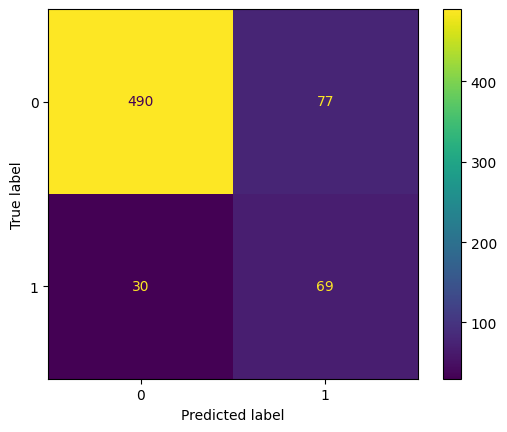

In [16]:
actual = y_test
predicted = preds


confusion_matrix = confusion_matrix(actual, predicted, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = classifier.classes_)
cm_display.plot()
plt.show()

c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
c:\Users\Lex Zedrick Lorenzo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


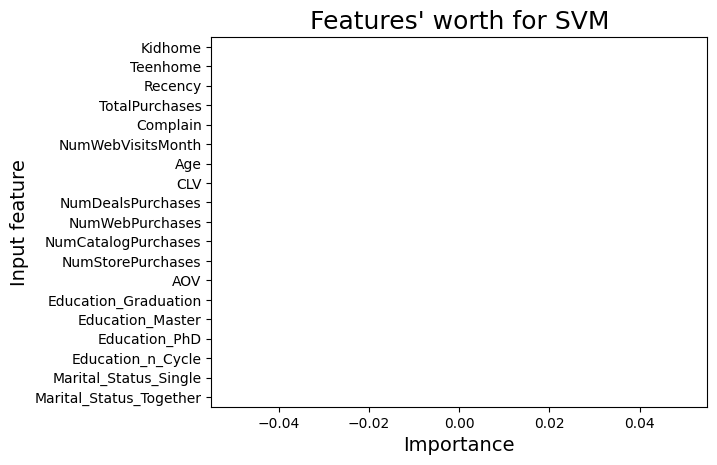

Marital_Status_Together: 0.0
NumDealsPurchases: 0.0
Teenhome: 0.0
Recency: 0.0
TotalPurchases: 0.0
Complain: 0.0
NumWebVisitsMonth: 0.0
Age: 0.0
CLV: 0.0
NumWebPurchases: 0.0
Marital_Status_Single: 0.0
NumCatalogPurchases: 0.0
NumStorePurchases: 0.0
AOV: 0.0
Education_Graduation: 0.0
Education_Master: 0.0
Education_PhD: 0.0
Education_n_Cycle: 0.0
Kidhome: 0.0


In [18]:
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline


# Define a ColumnTransformer for scaling
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', StandardScaler(), X.columns)
#     ])

# Use a pipeline to include the preprocessing step and the logistic regression model
pipeline = Pipeline([
    # ('preprocessor', preprocessor),
    ('classifier', classifier)
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Now, use the pipeline for permutation importance
result = permutation_importance(pipeline, X_test, y_test, n_repeats=30, random_state=42)

feature_importances = result.importances_mean
feature_indices = np.argsort(feature_importances)[::-1]

sns.barplot(y=X.columns, x=feature_importances)
plt.title("Features' worth for SVM", fontsize=18)
plt.ylabel("Input feature", fontsize=14)
plt.xlabel("Importance", fontsize=14)

plt.show()

# Print feature importance ranking
for idx in feature_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]}")